### Reading and Pre-processing Data

In [1]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

In [2]:
amazon_data = pd.read_csv('amazon_Reviews.csv')
amazon_data.head(1)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,review_rating
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,POSITIVE


In [3]:
amazon_data.count()

id                      4687
name                    4329
asins                   4687
brand                   4687
categories              4687
keys                    4687
manufacturer            4687
reviews.date            4677
reviews.dateAdded       3973
reviews.dateSeen        4687
reviews.didPurchase        0
reviews.doRecommend     4551
reviews.id                 0
reviews.numHelpful      4581
reviews.rating          4654
reviews.sourceURLs      4687
reviews.text            4687
reviews.title           4687
reviews.userCity           0
reviews.userProvince       0
reviews.username        4687
review_rating           4687
dtype: int64

In [4]:
X = amazon_data["reviews.text"].values.astype("U")
y = amazon_data["review_rating"]
print(X.shape, y.shape)

(4687,) (4687,)


In [5]:
X[0],y[0]

('This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.',
 'POSITIVE')

In [6]:
print(amazon_data["reviews.rating"].value_counts())

5.0    1645
3.0    1499
4.0     698
1.0     410
2.0     402
Name: reviews.rating, dtype: int64


In [7]:
print(amazon_data["review_rating"].value_counts())

NEGATIVE    2344
POSITIVE    2343
Name: review_rating, dtype: int64


In [8]:
amazon_data[["reviews.rating","review_rating"]].head()

,reviews.rating,review_rating
0,5.0,POSITIVE
1,5.0,POSITIVE
2,5.0,POSITIVE
3,4.0,POSITIVE
4,5.0,POSITIVE


In [9]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data


In [10]:
# cv.get_feature_names()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

In [12]:
# #amazon df
# vectorizer= TfidfVectorizer()
# X1_train_vectors=vectorizer.fit_transform(X1_train)
# # X1_test_vectors = vectorizer.transform(X1_test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
# Function to calculate accuracy , confusion matrix, classification report
def cal_accuracy(y_test, y_pred): 
      
    print("""\nConfusion Matrix: \n""", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("\nAccuracy : \n", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("\nClassification Report : \n", 
    classification_report(y_test, y_pred)) 
  

In [61]:
# Function to calculate accuracy score
def model_accuracy(y_test, y_pred): 
        return accuracy_score(y_test,y_pred)*100 
    

### Naive Bayes Classifier

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
# Naive Bayes Model
clf = MultinomialNB()
# Model Fit
clf.fit(X_train,y_train)
# Model Score
clf.score(X_test,y_test)
# Model Prediction
y_pred = clf.predict(X_test)
# Model Accuracy
cal_accuracy(y_test, y_pred)
NB_accuracy = model_accuracy(y_test, y_pred)


Confusion Matrix: 
 [[419 125]
 [ 61 474]]

Accuracy : 
 82.76181649675625

Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.87      0.77      0.82       544
    POSITIVE       0.79      0.89      0.84       535

    accuracy                           0.83      1079
   macro avg       0.83      0.83      0.83      1079
weighted avg       0.83      0.83      0.83      1079



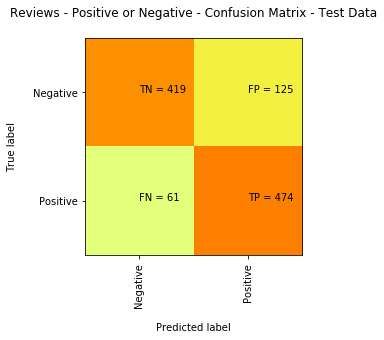

In [64]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Decision Tree

In [65]:
from sklearn import tree

In [66]:
# Decision Tree Model
tree_clf = tree.DecisionTreeClassifier()
# Model Fit
tree_clf = tree_clf.fit(X_train,y_train)
# Model score
tree_clf.score(X_test, y_test)
# Model Predict
y_tree_predicted = tree_clf.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_tree_predicted)
DT_accuracy = model_accuracy(y_test, y_tree_predicted)


Confusion Matrix: 
 [[383 161]
 [167 368]]

Accuracy : 
 69.6014828544949

Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.70      0.70      0.70       544
    POSITIVE       0.70      0.69      0.69       535

    accuracy                           0.70      1079
   macro avg       0.70      0.70      0.70      1079
weighted avg       0.70      0.70      0.70      1079



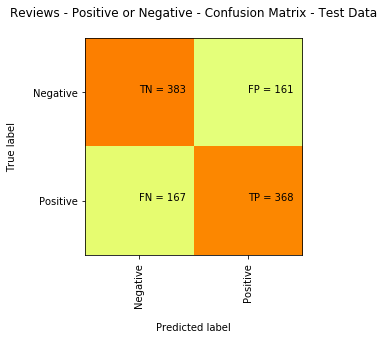

In [67]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_tree_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

###  Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=200)
# Model Fit
rf = rf.fit(X_train, y_train)
# Model Score
rf.score(X_test, y_test)
# Model Predict
y_rf_predicted = rf.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_rf_predicted)
RF_accuracy = model_accuracy(y_test, y_rf_predicted)


Confusion Matrix: 
 [[453  91]
 [104 431]]

Accuracy : 
 81.92771084337349

Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.81      0.83      0.82       544
    POSITIVE       0.83      0.81      0.82       535

    accuracy                           0.82      1079
   macro avg       0.82      0.82      0.82      1079
weighted avg       0.82      0.82      0.82      1079



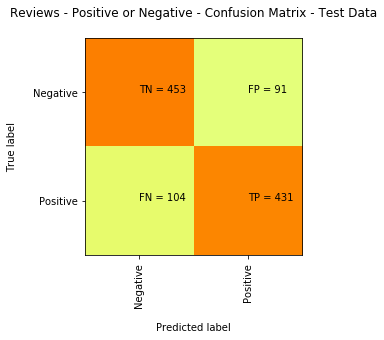

In [70]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_rf_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.629
k: 3, Train/Test Score: 0.823/0.639
k: 5, Train/Test Score: 0.800/0.664
k: 7, Train/Test Score: 0.774/0.677
k: 9, Train/Test Score: 0.750/0.675
k: 11, Train/Test Score: 0.736/0.671
k: 13, Train/Test Score: 0.729/0.680
k: 15, Train/Test Score: 0.723/0.680
k: 17, Train/Test Score: 0.721/0.688
k: 19, Train/Test Score: 0.721/0.682
k: 21, Train/Test Score: 0.715/0.691
k: 23, Train/Test Score: 0.716/0.690
k: 25, Train/Test Score: 0.716/0.692
k: 27, Train/Test Score: 0.713/0.692
k: 29, Train/Test Score: 0.712/0.694
k: 31, Train/Test Score: 0.706/0.698
k: 33, Train/Test Score: 0.706/0.696
k: 35, Train/Test Score: 0.705/0.690
k: 37, Train/Test Score: 0.700/0.687
k: 39, Train/Test Score: 0.700/0.679


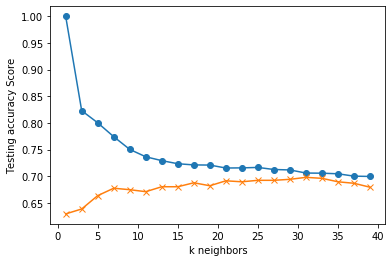

In [72]:
# KNN Model
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    # Knn Model
    knn = KNeighborsClassifier(n_neighbors=k)
    # Model Fit
    knn.fit(X_train, y_train)
    # Model score
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [83]:
# Note that k: 29 provides the best accuracy where the classifier starts to stablize
# Model
knn = KNeighborsClassifier(n_neighbors=31)
# Model Fit
knn.fit(X_train, y_train)
print("K=31")
# Model Predict
y_knn_predicted = knn.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_knn_predicted)
KNN_accuracy = model_accuracy(y_test, y_knn_predicted)

K=31

Confusion Matrix: 
 [[257 287]
 [ 39 496]]

Accuracy : 
 69.78683966635774

Classification Report : 
               precision    recall  f1-score   support

    NEGATIVE       0.87      0.47      0.61       544
    POSITIVE       0.63      0.93      0.75       535

    accuracy                           0.70      1079
   macro avg       0.75      0.70      0.68      1079
weighted avg       0.75      0.70      0.68      1079



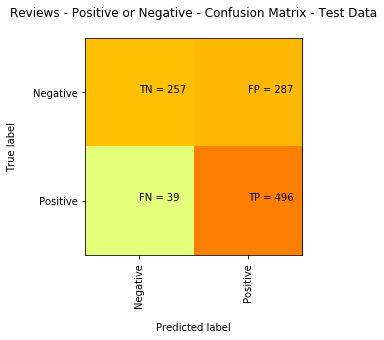

In [84]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_knn_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Logistics Regression

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
# Logistic Regression Model
lr = LogisticRegression(random_state= 42)
# Model Fit
lr = lr.fit(X_train, y_train)
# Model Score
lr.score(X_test, y_test)
# Model Predict
y_lr_predicted = lr.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_lr_predicted)
LR_accuracy = model_accuracy(y_test, y_lr_predicted)

NameError: name 'X_train' is not defined

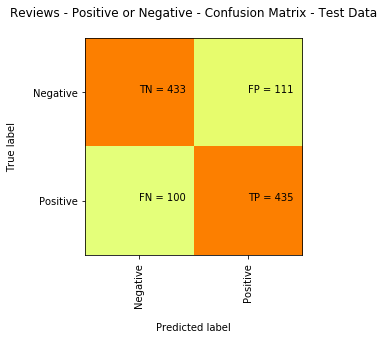

In [87]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_lr_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Plot

[82.76181649675625, 69.6014828544949, 81.92771084337349, 69.78683966635774, 80.44485634847081]


([<matplotlib.axis.XTick at 0x123c8ed30>,
 <a list of 5 Text xticklabel objects>)

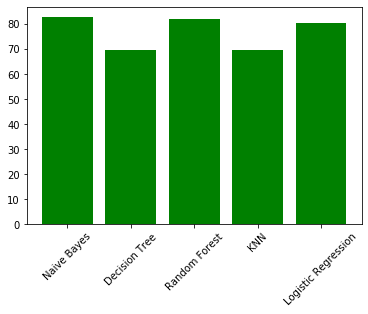

In [88]:
# Plotting the accuracy of models
accuracy_score_list = []
accuracy_score_list.append(NB_accuracy)
accuracy_score_list.append(DT_accuracy)
accuracy_score_list.append(RF_accuracy)
accuracy_score_list.append(KNN_accuracy)
accuracy_score_list.append(LR_accuracy)
y_axis = accuracy_score_list
print(accuracy_score_list)
models_list = ["Naive Bayes","Decision Tree","Random Forest","KNN","Logistic Regression"]
x_axis = [1,2,3,4,5]
plt.bar(x_axis, y_axis,color= "green")
plt.xticks(x_axis,models_list,rotation=45)

### Wordcloud

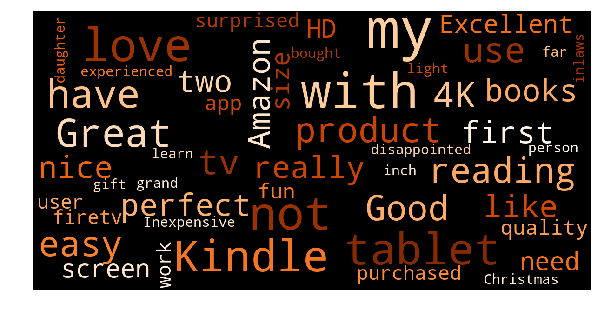

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 50,
        max_font_size = 40,
        colormap="Oranges_r",
        stopwords=["charger", "nothing","well","beginner","cover","but","and","remote","to","so","other","she","gave","go","Fire","Got","weeks","had","up","I've","does","is","on","from","the","was","in","or","th","it","thi","this","about","him","did","now","after","when","that","as","for","any","lot","has","than","Boug","of"],
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(amazon_data["reviews.text"])

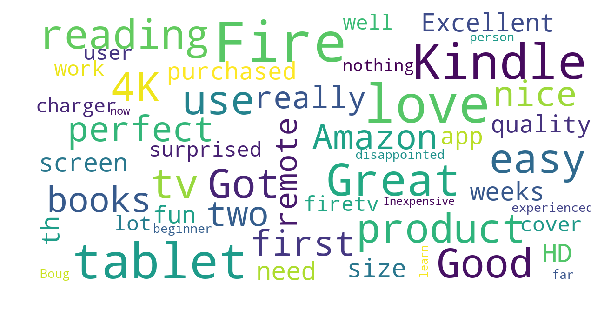

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 50,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(amazon_data["reviews.text"])